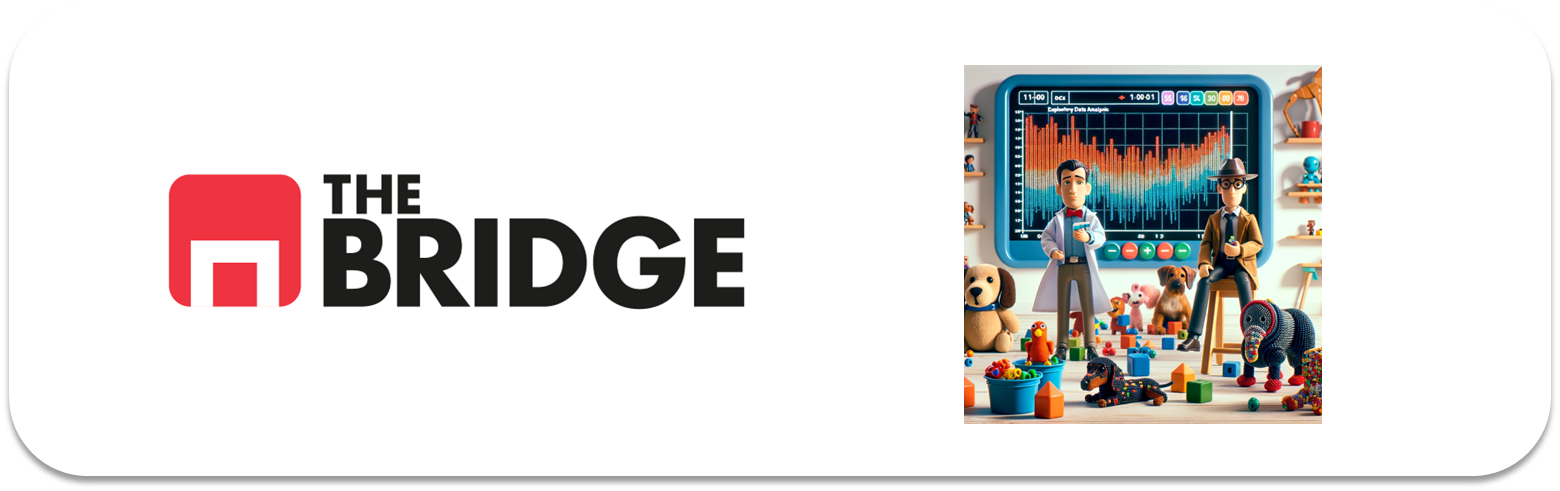

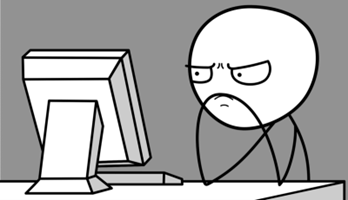

Para ejercitarte y afianzar lo aprendido sobre análisis multivariante, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import bootcampviztools as booty

### Ejercicio 1

Carga el dataset de admisiones que conoces de la unidad anterior y que se encuentra en la ruta "./data/admission_data.csv", deshazte de las columnas innecesarias

In [6]:
admisDF = pd.read_csv('./data/admission_data.csv')

In [8]:
admisDF.drop(columns=['Unnamed: 0', 'Year'], inplace=True)

### Ejercicio 2

Realiza los análisis multivariante que consideres necesarios para contestar apoyándote en los datos a las preguntas: 

1. ¿Existe algún departamento específico donde pudieramos hablar de discriminación?
2. ¿Están estos resultados en consonancia con lo obtenido en el análisis bivariante de admisiones y género? 

In [ ]:
booty.pinta_distribucion_categoricas(admisDF, ['Major', 'Gender', 'Admission'], relativa=True, mostrar_valores=True)
booty.plot_categorical_relationship_fin(admisDF, 'Major', 'Gender', relative_freq=True, show_values=True)
booty.plot_categorical_relationship_fin(admisDF, 'Admission', 'Gender', relative_freq=True, show_values=True)
booty.plot_categorical_relationship_fin(admisDF, 'Major', 'Admission', relative_freq=True, show_values=True)

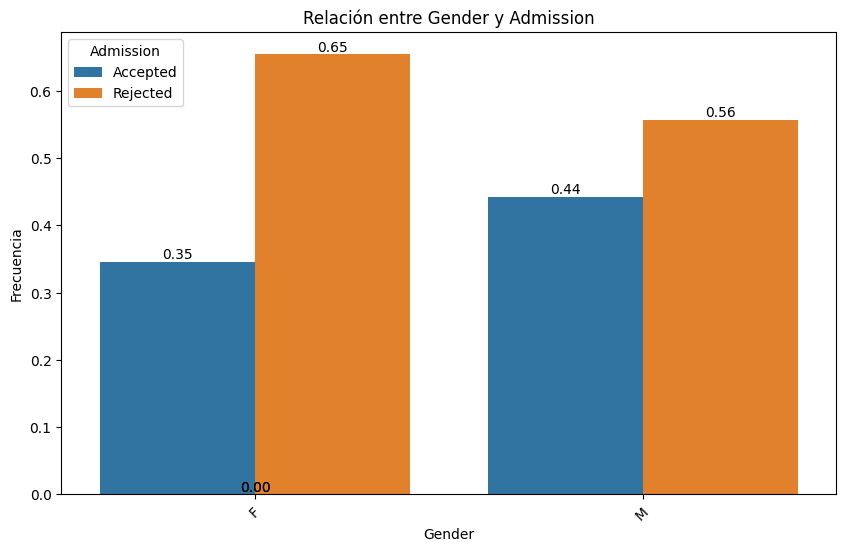

In [24]:
booty.plot_categorical_relationship_fin(admisDF, 'Gender', 'Admission', relative_freq=True, show_values=True)

In [15]:
admisDF.head()

,Major,Gender,Admission
0,School of Medicine,F,Rejected
1,Department of Economics,M,Accepted
2,Other,F,Accepted
3,Other,M,Accepted
4,Other,M,Rejected


In [16]:
from scipy.stats import chi2_contingency

In [19]:
pivot_table = pd.crosstab(admisDF['Major'], [admisDF['Gender'], admisDF['Admission']])
pivot_table

Gender                                                    F                 M  \
Admission                                          Accepted Rejected Accepted   
Major                                                                           
Department of Economics                                  17        8      353   
Department of Mechanical Engineering                    131      244      138   
Department of Physics and Astronomy                      89       19      825   
Department of Psychology                                 25      316       22   
Other                                                   937     1549     2227   
School of Medicine                                      201      392      120   
School of Political Science and International R...       94      299       53   

Gender                                                       
Admission                                          Rejected  
Major                                                        
Department of Economics                                 207  
Department of Mechanical Engineering                    279  
Department of Physics and Astronomy                     313  
Department of Psychology                                351  
Other                                                  3211  
School of Medicine                                      205  
School of Political Science and International R...      138

In [22]:
chi2, p_val, dof, expected = chi2_contingency(pivot_table)
print("Chi-Squared Value:", chi2)
print("P-Value:", p_val)
print("Degrees of freedom:", dof)
if p_val < 0.05:
    print("There is a statistically significant association between gender and admission response across different majors.")
else:
    print("There is NO statistically significant association between gender and admission response across different majors.")
print()
print("Expected frequencies table: \n", expected)

Chi-Squared Value: 2500.1176836468157
P-Value: 0.0
Degrees of freedom: 18
There is a statistically significant association between gender and admission response across different majors.

Expected frequencies table: 
 [[  68.47841417  129.57729374  171.33354227  215.61074982]
 [  92.70923764  175.42772076  231.95925723  291.90378438]
 [ 145.85316932  275.98856068  364.92580114  459.23246886]
 [  83.57878242  158.15074826  209.11478493  263.1556844 ]
 [ 927.56060487 1755.16320614 2320.76408368 2920.5121053 ]
 [ 107.45843454  203.33667633  268.86186633  338.3430228 ]
 [  68.36135705  129.35579409  171.04066442  215.24218444]]


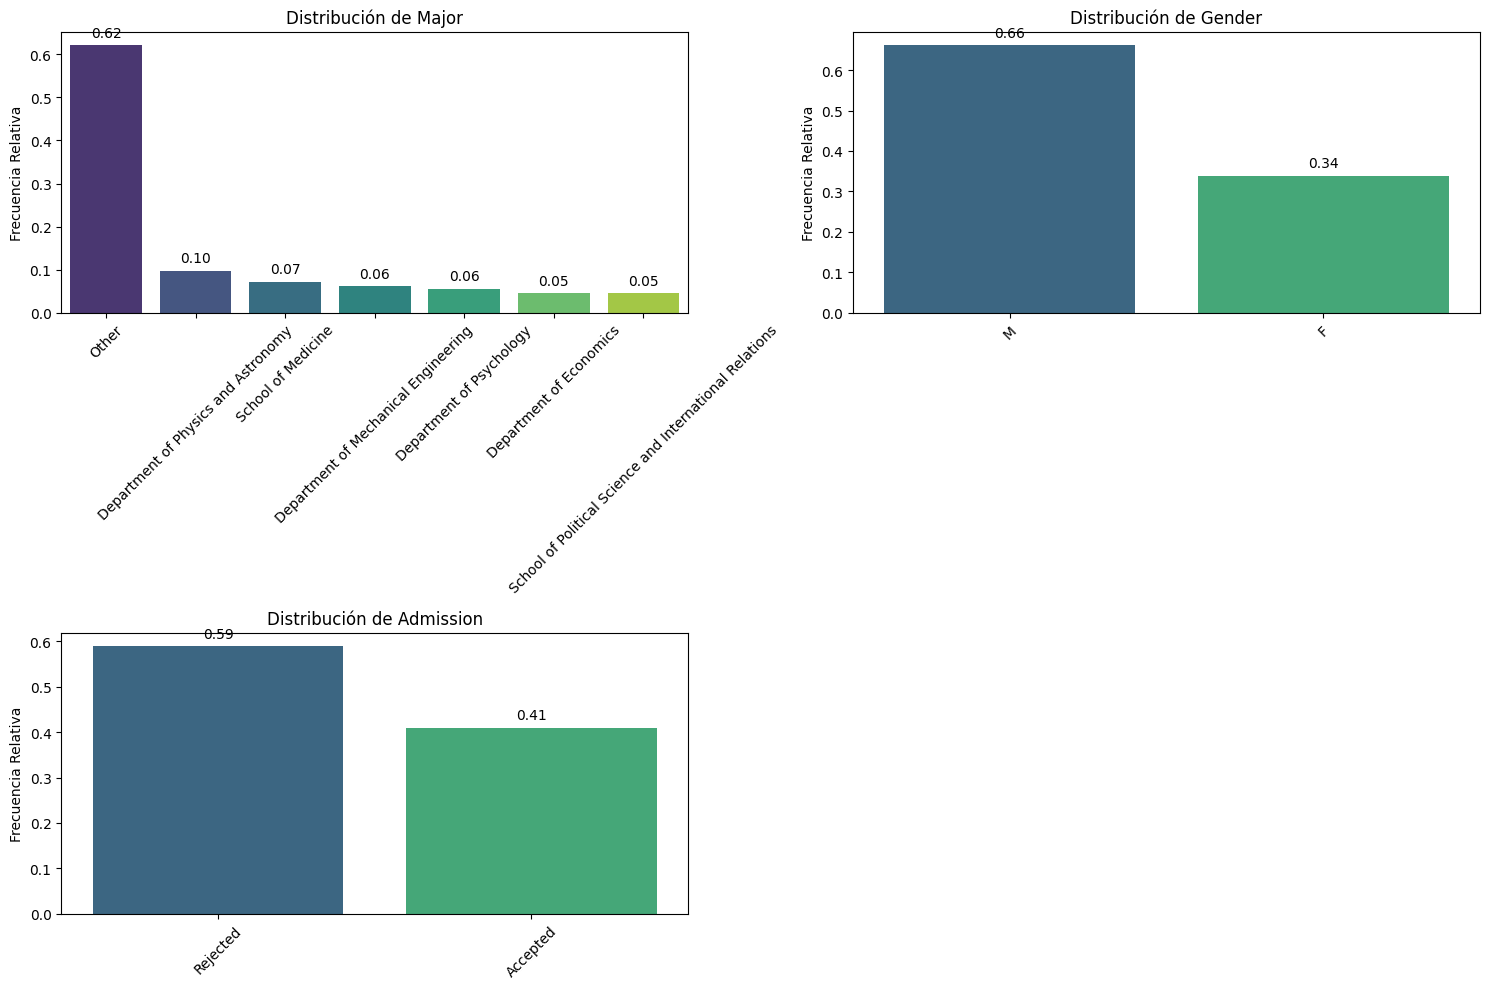

In [25]:
booty.pinta_distribucion_categoricas(admisDF, ['Major', 'Gender', 'Admission'], relativa=True, mostrar_valores=True)

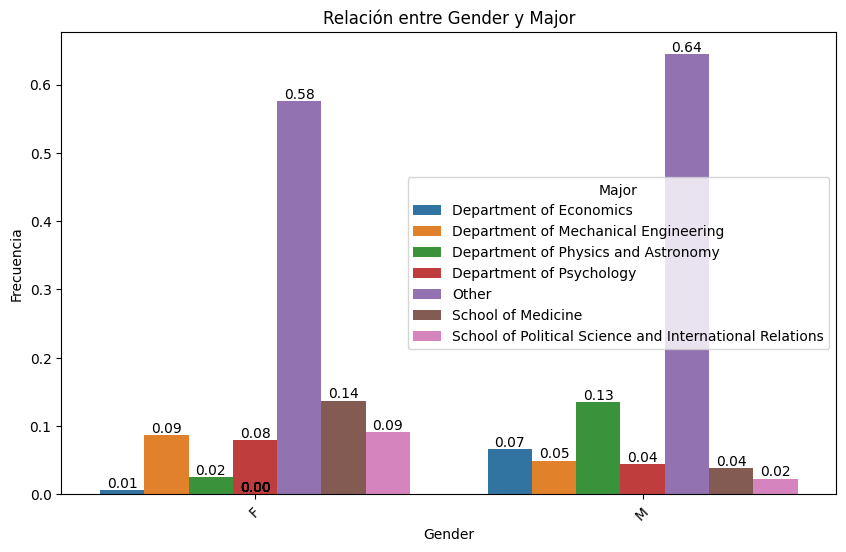

In [26]:
booty.plot_categorical_relationship_fin(admisDF, 'Gender', 'Major', relative_freq=True, show_values=True)


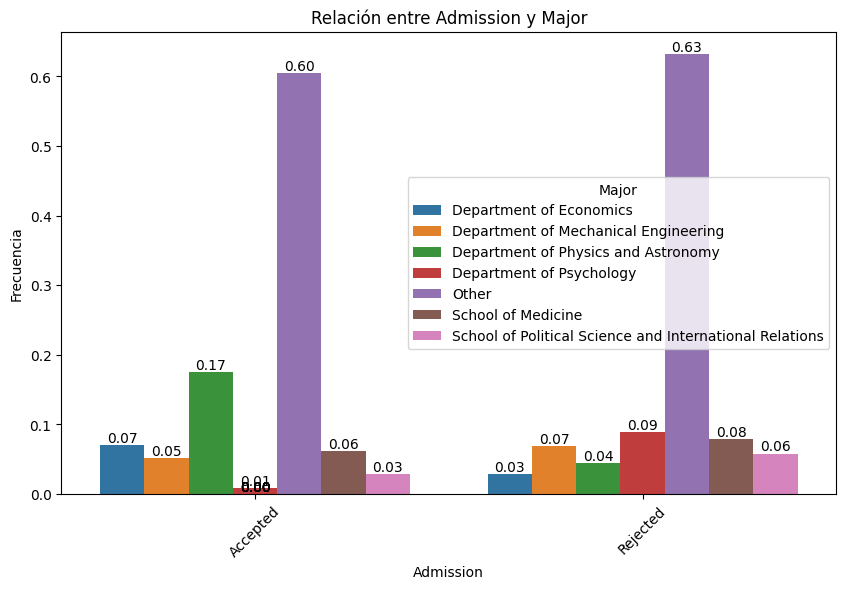

In [27]:
booty.plot_categorical_relationship_fin(admisDF, 'Admission', 'Major', relative_freq=True, show_values=True)


### Ejercicio 3

Carga el dataset de propinas (tips) que conoces de la unidad anterior y que se encuentra en la ruta "./data/tips.csv", deshazte de las columnas innecesarias

In [35]:
tipsDF = pd.read_csv("./data/tips.csv")
tipsDF.drop(columns='Unnamed: 0', inplace=True)

### Ejercicio 4

Carga el dataset de accidentes que conoces de la unidad anterior y que se encuentra en la ruta "./data/car_crashes.csv", deshazte de las columnas innecesarias y renombra la que contiene las iniciales de los estados a "state"

In [31]:
crashesDF = pd.read_csv("./data/car_crashes.csv", sep='|')
crashesDF.drop(columns='Unnamed: 0', inplace = True)

In [33]:
crashesDF.rename(columns={'abbrev': 'state'}, inplace=True)

### Ejercicio 5

Realiza una análisis de todas las posibles correlaciones dos a dos, de forma numérica primero y luego empleado un heatmap y un pairplot de seaborn. ¿Qué variables tienen o aparentemente tienen una mayor correlación con "total?

In [36]:
corr_matrix = crashesDF.corr(numeric_only= True) # Si no lo pones y tienes variables tipo texto, fallará7
corr_matrix

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


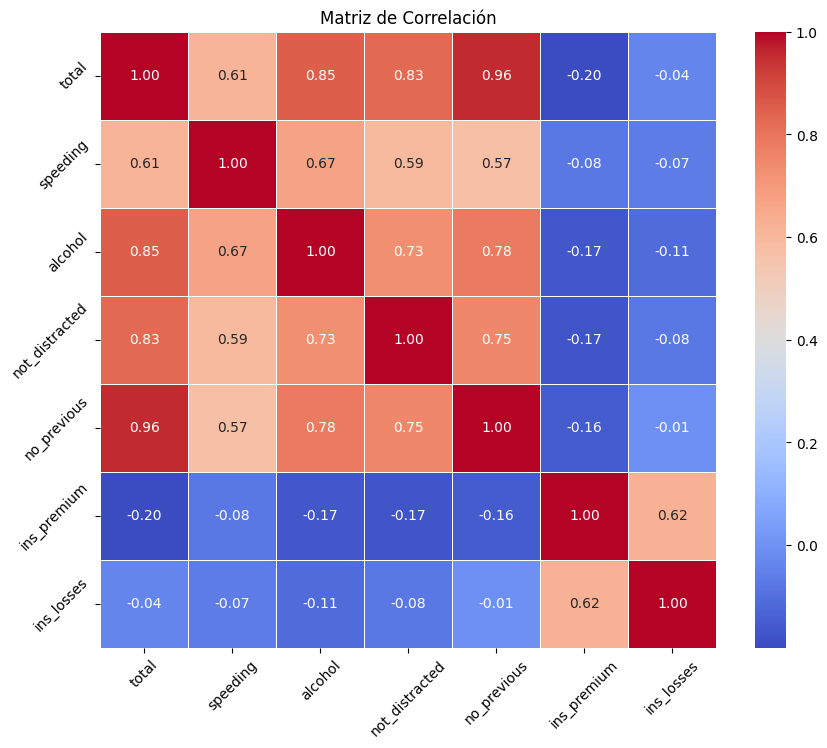

In [37]:
plt.figure(figsize=(10, 8))  # Ya lo veremos pero esto permite ajustar el tamaño de las gráficas
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar=True, square=True, linewidths=.5) # el cmap es el rango de colores usado para representar "el calor"

plt.title('Matriz de Correlación')
plt.xticks(rotation=45)  # Rota las etiquetas de las x si es necesario
plt.yticks(rotation=45)  # Rota las etiquetas de las y si es necesario

plt.show()


### Ejercicio 6

Realiza un análisis multivariante entre las variables numéricas "total", "alcohol", "speeding". ¿Puedes sacar alguna conclusión interesante?

(3, 2)


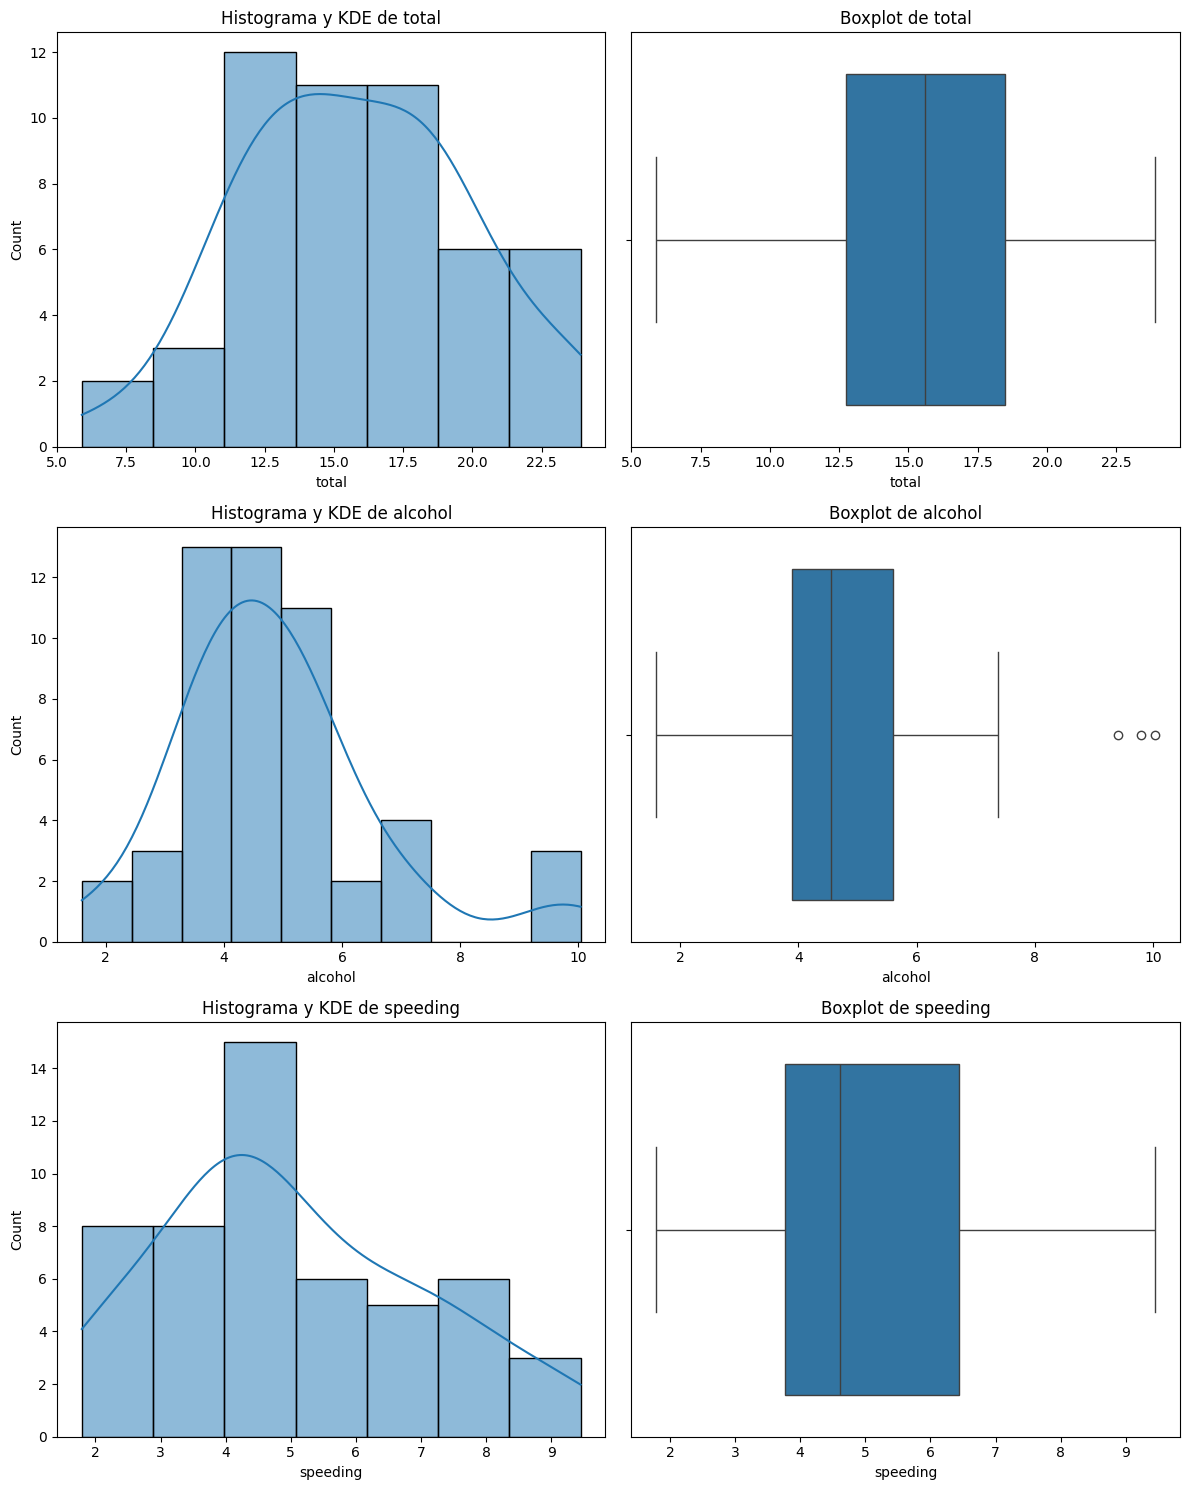

In [39]:
booty.plot_combined_graphs(crashesDF, ['total', 'alcohol', 'speeding'])

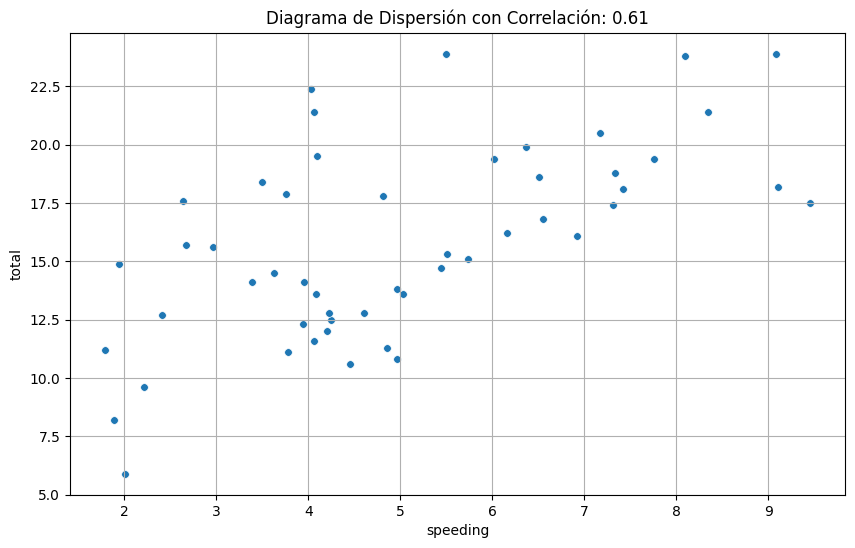

In [40]:
booty.grafico_dispersion_con_correlacion(crashesDF, 'speeding','total', mostrar_correlacion=True, tamano_puntos=30)

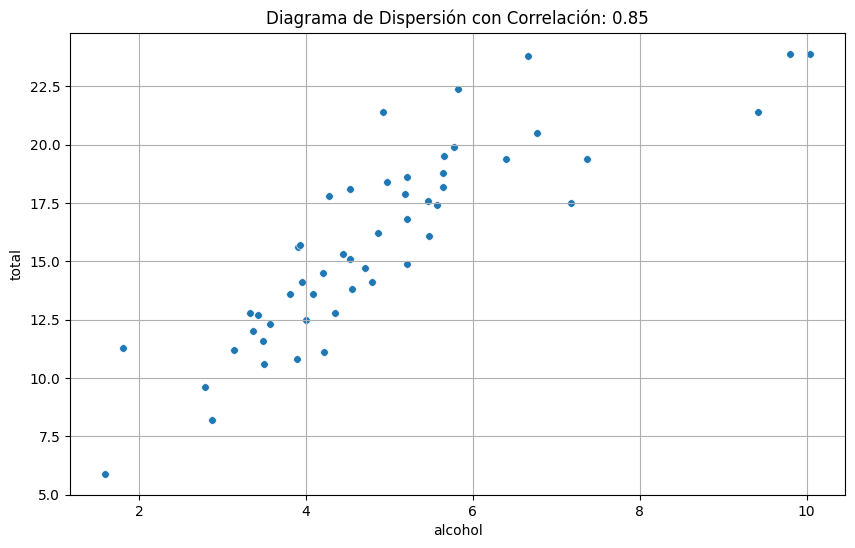

In [41]:
booty.grafico_dispersion_con_correlacion(crashesDF, 'alcohol','total', mostrar_correlacion=True, tamano_puntos=30)

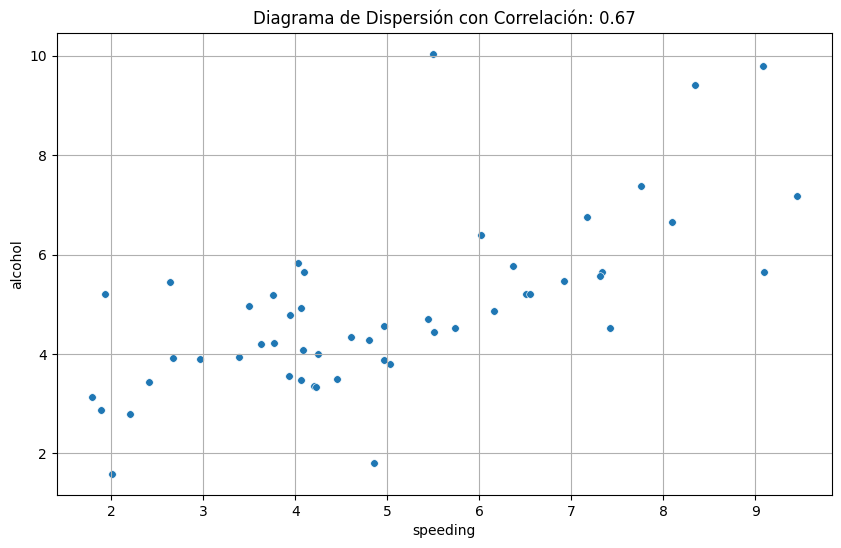

In [43]:
booty.grafico_dispersion_con_correlacion(crashesDF, 'speeding','alcohol', mostrar_correlacion=True, tamano_puntos=30)

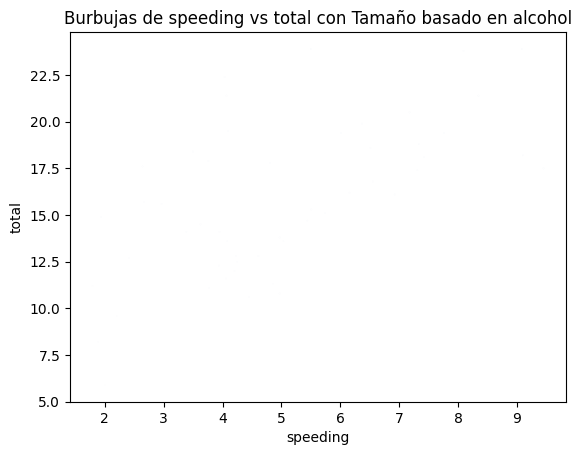

In [46]:
booty.bubble_plot(crashesDF,"speeding","total","alcohol", scale = 100000)